In [1]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO
# DESTE EP.
#
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM
# DESONESTIDADE ACADÊMICA OU PLÁGIO.
#
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS 
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A 
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E 
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS 
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. 
#
#
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO 
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR 
# DESONESTIDADE ACADÊMICA. 
# 
# 
# Nome : Arthur Pilone Maia da Silva
# NUSP : 11795450	
# Turma: MAC0417
# Prof.: Ronaldo Fumio Hashimoto
##################################################################

In [2]:
import cv2 
import os
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from ImageRepo import ImageRepo

## Utilities

In [3]:
def monta_histograma(imgm):
	"""
	Monta histograma com frequência dos niveis de intensidade de uma imagem
	"""
	pixels_imagem = len(imgm) * len(imgm[0])
	histograma = np.zeros(256)
	for row in range(len(imgm)):
		for col in range(len(imgm[0])):
			histograma[int(imgm[row][col])] += 1
	return histograma/pixels_imagem

def plota_histograma(histograma,titulo):
	xs = np.arange(256)
	plt.fill_between(xs,histograma, step="mid")
	plt.plot(xs,histograma, drawstyle="steps-mid")
	plt.title(titulo)
	plt.axis('off')
	plt.show()

def monta_mapa_cores_histograma_equalizado(histograma_og):
	"""
	Monta o vetor S com o mapa entre as instensidades originais
	e as da imagem equalizada
	"""
	mapa = []
	soma_pks = 0
	for k in range(256):
		soma_pks += histograma_og[k]
		sk = int(255 * soma_pks)
		mapa.append(sk)

	return mapa

def mapeia_cores(imgm_og,mapa):
	"""
	Dado um mapa de intensidades / cores e uma imagem,
	gera uma nova imagem
	"""
	rows = len(imgm_og)
	cols = len(imgm_og[0])

	resultado = []
	for i in range(rows):
		resultado.append([])
		for j in range(cols):
			intst = mapa[int(imgm_og[i][j])]
			resultado[i].append(intst)

	return np.array(resultado)

def normalize_image(original_image):
	histogram = monta_histograma(original_image)
	color_map = monta_mapa_cores_histograma_equalizado(histogram)
	new_image = mapeia_cores(original_image,color_map)
	return new_image

In [4]:
def create_normalized_dataset(original_repo):

	original_path = original_repo.get_repo_path()
	new_path = "./normalizedDataset/" + original_path

	if os.path.isdir(new_path):
		print("Target repository already exists. Skipping repository creation.")
		return

	os.mkdir(new_path)
	
	for image_path in original_repo.get_paths_from_all_images():
		picture_name = image_path.split('/')[-1]

		original_image = pltimg.imread(image_path)

		normalized_image = normalize_image(original_image)

		cv2.imwrite(new_path + "/" + picture_name, normalized_image)

if not os.path.isdir("./normalizedDataset"):
	os.mkdir("./normalizedDataset")
	os.mkdir("./normalizedDataset/augmentedDataset")

In [5]:
gray_dataset = ImageRepo("./originalGrayDataset/")
contrast_dataset = ImageRepo("./augmentedDataset/contrast_stretch/")
log_dataset = ImageRepo("./augmentedDataset/log/")
power_dataset = ImageRepo("./augmentedDataset/power/")
laplacian_dataset = ImageRepo("./augmentedDataset/laplacian/")
mean_filter = ImageRepo("./augmentedDataset/mean_filter/")


In [6]:
create_normalized_dataset(gray_dataset)
create_normalized_dataset(contrast_dataset)
create_normalized_dataset(log_dataset)
create_normalized_dataset(power_dataset)
create_normalized_dataset(laplacian_dataset)
create_normalized_dataset(mean_filter)

In [7]:
def plot_img(fig):
	plt.figure(figsize=(10,10))
	plt.imshow(fig, cmap='gray', vmin=0, vmax=255)
	plt.axis('off')
	plt.show()

def plot_analysis_results(data_by_light_condition):
	cols = len(data_by_light_condition)

	_, axs = plt.subplots(4,cols, figsize=(2*cols, 20/3))
	i,j = 0,0
	for light_condition in data_by_light_condition.keys():
		info = data_by_light_condition[light_condition]
		no_ims =  info["no_imgs"]

		original_image = info["first_image"]
		normalized_image = info["first_image_normalized"]
		original_histogram = info["original_histogram_sum"]/no_ims
		normalized_histogram = info["normalized_histogram_sum"]/no_ims

		xs = np.arange(256)

		axs[0,j].imshow(original_image,cmap="gray")
		axs[0,j].set_title(light_condition)

		axs[1,j].fill_between(xs,original_histogram, step="mid")
		axs[1,j].plot(xs,original_histogram, drawstyle="steps-mid")

		axs[2,j].imshow(normalized_image,cmap="gray")

		axs[3,j].fill_between(xs,normalized_histogram, step="mid")
		axs[3,j].plot(xs,normalized_histogram, drawstyle="steps-mid")
		
		# axs[i,j].set_title(titles[k])

		j += 1

	for j in range(cols):
		for i in range(4):
			axs[i,j].axis('off')
	
	plt.show()

def analyse_normalization_impact(original_repo):

	empty_light_info = {
		"original_histogram_sum": np.zeros(256),
		"normalized_histogram_sum": np.zeros(256),
		"no_imgs": 0,
		"first_image": None,
		"first_image_normalized": None
	}

	data_by_light_condition = {
		"morning": copy.deepcopy(empty_light_info),
		"afternoon": copy.deepcopy(empty_light_info),
		"dusk": copy.deepcopy(empty_light_info),
		"night": copy.deepcopy(empty_light_info),
	}

	original_path = original_repo.get_repo_path()
	normalized_path = "./normalizedDataset/" + original_path

	for image_path,light_condition in original_repo.get_all_images_and_lightning():
		picture_name = image_path.split('/')[-1]
		original_image = pltimg.imread(image_path)
		normalized_image =  pltimg.imread(normalized_path + picture_name)

		original_img_histogram = monta_histograma(original_image)
		normalized_image_histogram = monta_histograma(normalized_image)

		data_by_light_condition[light_condition]["original_histogram_sum"] += original_img_histogram
		data_by_light_condition[light_condition]["normalized_histogram_sum"] += normalized_image_histogram
		data_by_light_condition[light_condition]["no_imgs"] += 1

		if(data_by_light_condition[light_condition]["first_image"] is None):
			

			data_by_light_condition[light_condition]["first_image"] = original_image
			data_by_light_condition[light_condition]["first_image_normalized"] = normalized_image

	plot_analysis_results(data_by_light_condition)

#### Comparing normalization over the original gray scale dataset

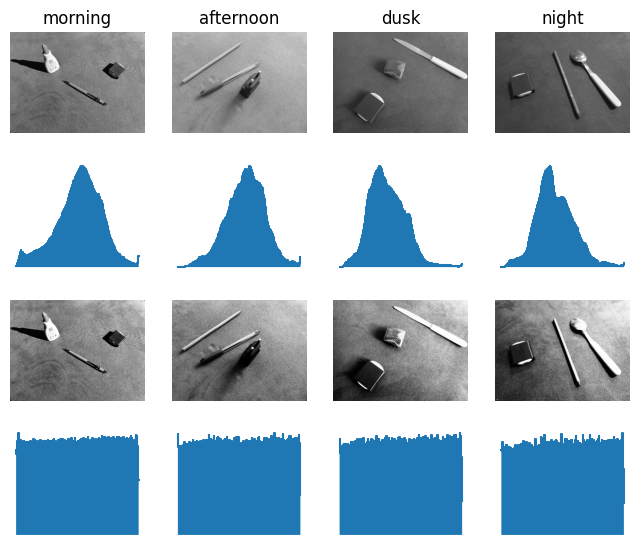

In [8]:
analyse_normalization_impact(gray_dataset)

#### Comparing normalization over contrast-stretch augmented dataset

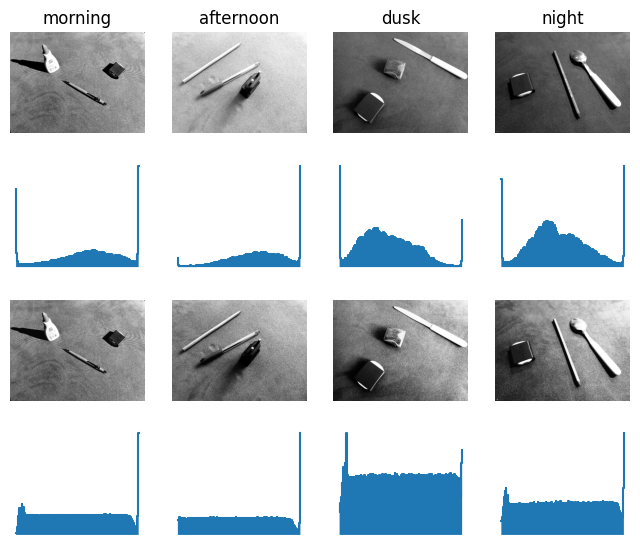

In [9]:
analyse_normalization_impact(contrast_dataset)

#### Comparing normalization over log scaled augmented dataset

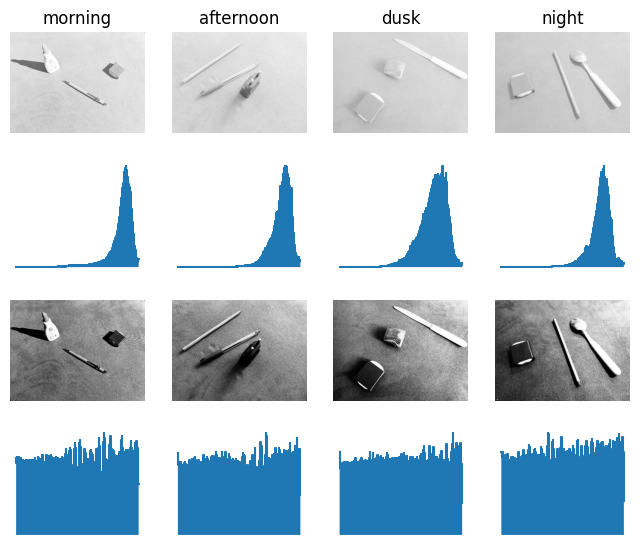

In [10]:
analyse_normalization_impact(log_dataset)

#### Comparing normalization over power law scaled augmented dataset

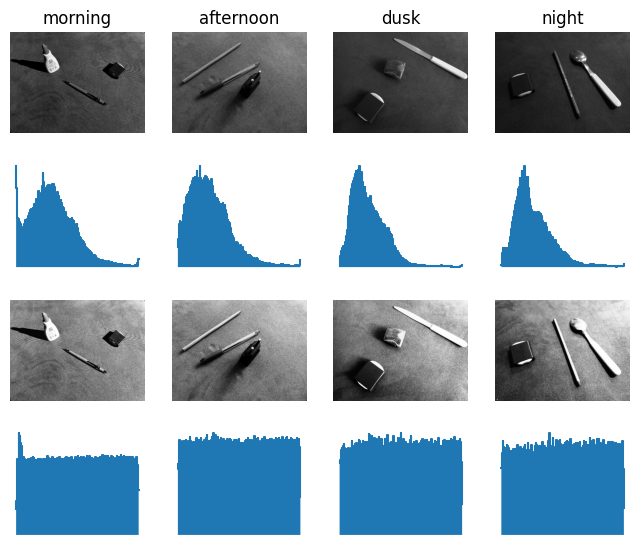

In [11]:
analyse_normalization_impact(power_dataset)

#### Comparing normalization over laplacian dataset

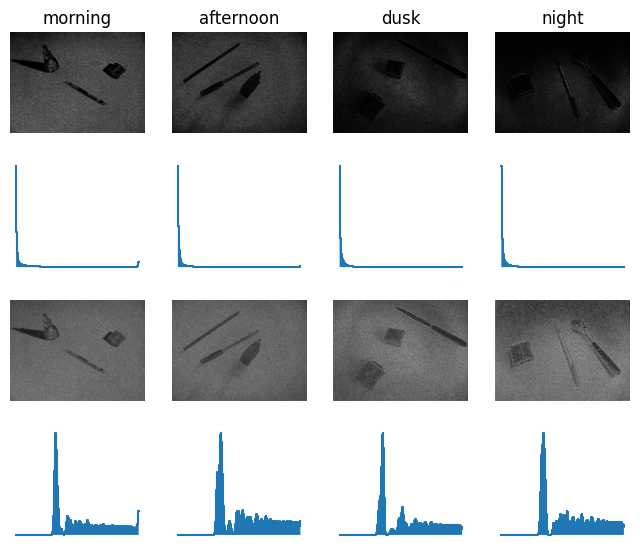

In [12]:
analyse_normalization_impact(laplacian_dataset)

#### Comparing normalization over mean filter augmented dataset

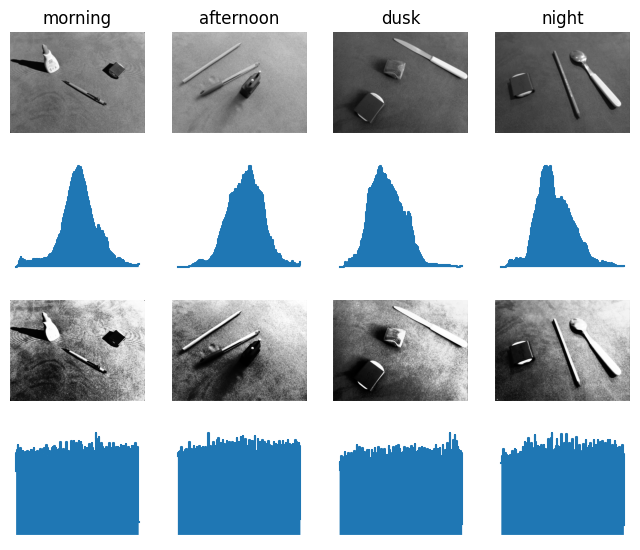

In [13]:
analyse_normalization_impact(mean_filter)

### Discussion

Na maioria dos casos, a normalização do histograma das imagens aumentou a nitidez e o contraste das imagens, facilitando a interpretação delas. A única exceção é para o caso das imagens contendo os laplacianos das fotos originais. Como o laplaciano carrega informação sobre a variação de intensidade em curtas distâncias, costuma ter valores baixos e que pouco variam. Nesses casos, a equalização de histograma gerou imagens mais difíceis de se interpretar do que os laplacianos originais, à medida que ruídos foram intensificados e as silhuetas dos objetos ficaram mais difíceis de serem identificadas.

O mais interessante, entretanto, é observar a grande diferença que a equalização de histograma faz para os datasets das transformações de log e da power law. As duas transformações haviam diminuído o contraste das imagens originais, deixando as imagens muito claras no caso da log, e mais escuras no caso da power law. Logo, a aplicação da equalização do histograma nesses casos tornou as imagens fortemente mais nítidas.